Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
 [[19  1]
 [ 0 10]]

Stratified 5-Fold CV Accuracy: 0.9250 ± 0.0553


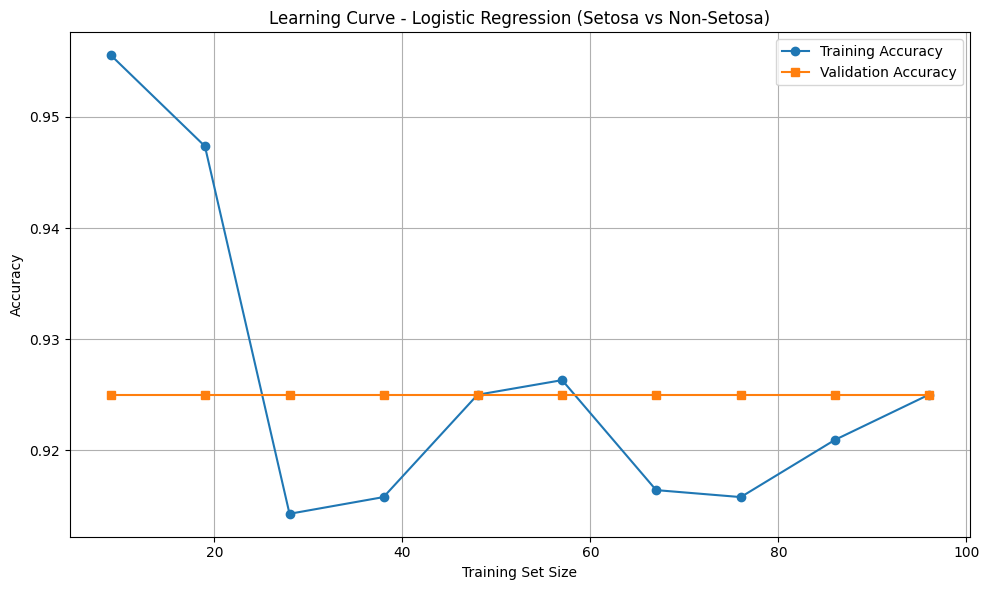

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif

# Load the dataset
df = pd.read_csv("C:/Users/Eshu/Downloads/logistic_regression_iris/Iris.csv")
df.drop('Id', axis=1, inplace=True)

# Convert to binary classification: Setosa vs Non-Setosa
df['Species'] = np.where(df['Species'] == 'Iris-setosa', 1, 0)

# Features and target
X = df.drop('Species', axis=1)
y = df['Species']

# Split dataset with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature selection: Select top 2 features based on ANOVA F-score
selector = SelectKBest(score_func=f_classif, k=2)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Logistic Regression with stronger regularization
model = LogisticRegression(
    solver='liblinear',
    C=0.001,  # Stronger regularization
    class_weight='balanced',
    random_state=42
)

# Train the model
model.fit(X_train_scaled, y_train)

# Evaluate model on test set
y_pred = model.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Stratified 5-fold cross-validation accuracy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')
print(f"\nStratified 5-Fold CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train_scaled, y_train,
    cv=cv,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy',
    shuffle=True,
    random_state=42
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', marker='o')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', marker='s')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Logistic Regression (Setosa vs Non-Setosa)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
